In [45]:
##训练MNIST数据集(使用Keras)
##准备数据集
from __future__ import print_function 
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import SGD
from matplotlib import pyplot as plt 

batch_size=128
num_classes=10 
epochs=15 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [46]:
##展示训练集的前16张图像
def show_samples(samples,labels):
    plt.figure(figsize=(12,12))
    for i in range(len(samples)):
        plt.subplot(4,4,i+1)
        plt.imshow(samples[i],cmap='gray')
        plt.title(labels[i])
    plt.show()

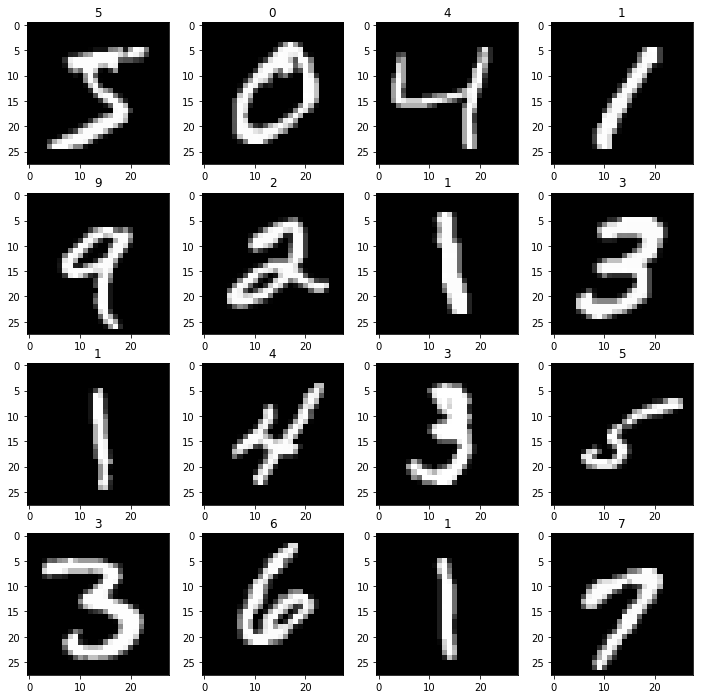

In [24]:
show_samples(x_train[:16],y_train[:16])

In [47]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#样本归一化
x_train/=255
x_test/=255

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [26]:
##构造神经网络
model=Sequential()
model.add(Dense(15,activation='relu',input_shape=(784,)))
model.add(Dense(num_classes,activation='sigmoid'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

history=model.fit(x_train,y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))
print(history.history.keys())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 2.0286 - acc: 0.3371 - val_loss: 1.5785 - val_acc: 0.6362
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 1.0597 - acc: 0.7591 - val_loss: 0.7233 - val_acc: 0.8308
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.6265 - acc: 0.8463 - val_loss: 0.5250 - val_acc: 0.8713
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - 

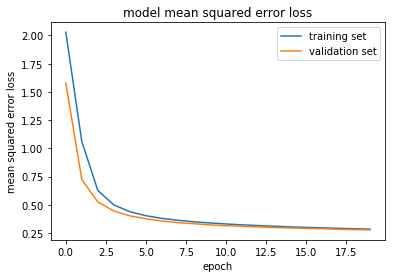

In [27]:
def plot_training(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set','validation set'],loc='upper right')
    plt.show()

plot_training(history=history)

In [31]:
score=model.evaluate(x_test,y_test,verbose=0)

In [33]:
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.27671262604
Test accuracy: 0.9219


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 116us/step - loss: 1.6636

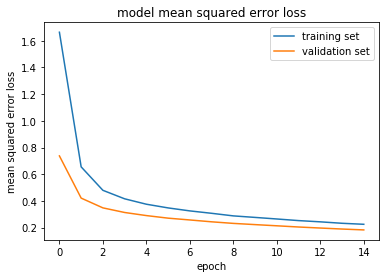

Test loss: 0.183003017234
Test accuracy: 0.9461


In [49]:
##深层网络
from keras.layers import Dropout 
from keras.optimizers import RMSprop 

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='sigmoid'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

history=model.fit(x_train,y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))

print(history.history.keys())
plot_training(history=history)
model.save('model.jason')

score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

predict [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5]
true; [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


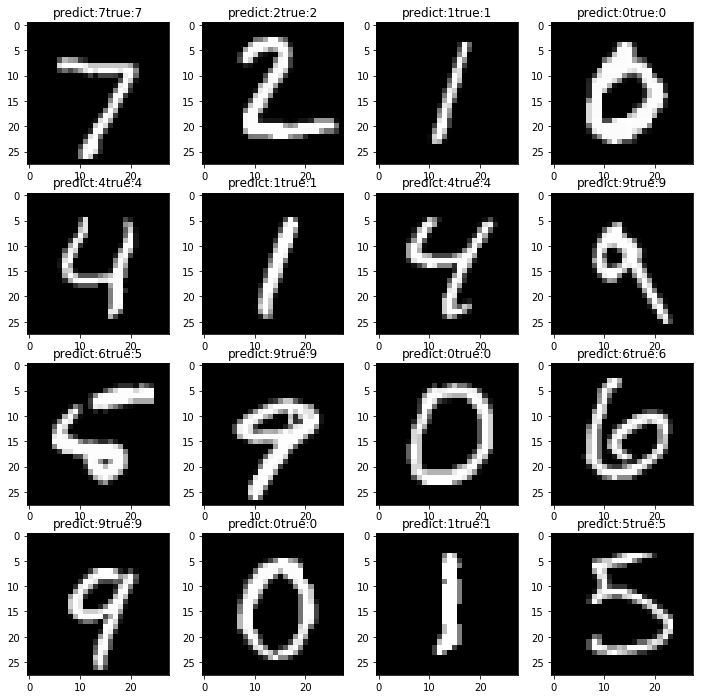

In [50]:
import numpy as np 
result=model.predict(x_test[:16])
result=np.argmax(result,1)
print('predict',result)
true=np.argmax(y_test[:16],1)
print('true;',true)

fig2=plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap='gray')
    plt.title('predict:'+str(result[i])+'true:'+str(true[i]))
plt.show()